In [9]:
#importa as bibliotecas
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import cv2
import time

In [10]:
#determina o fato de balanceamento 0.2 -> média
BALANCE_ALPHA = 0.2 

In [11]:
#função que retorna a matriz 3x3 que será utilizada nos filtros
def get_kernel():
    return np.ones((3, 3), np.float32) / 9

In [12]:
#função que atualiza o pixel com a media dos valores de brilho dos pixels vizinhos
def get_mean_with_kernel(filter_area, kernel):
    return np.sum(np.multiply(kernel, filter_area))

In [13]:
#função que atualiza o pixel com o valor da mediana dos pixels do kernel
def get_median(filter_area):
    res = np.median(filter_area)
    return res

In [14]:
#função que realiza o filtro balanceado da média e mediana
def mean_median_balanced_filter(image, height, width):
    for row in range(1, height + 1):
        for column in range(1, width + 1):
            filter_area = image[row - 1:row + 2, column - 1:column + 2]
            mean_filter_vector = get_mean_with_kernel(filter_area, get_kernel())
            median_filter_vector = get_median(filter_area)
            image[row][column] = BALANCE_ALPHA * mean_filter_vector + (1 - BALANCE_ALPHA) * median_filter_vector
    return image

In [15]:
def filter_image(image, filtering_function):
    
    height, width = image.shape[:2]

    #Adiciona 1 pixel nas bordas para que o kernel funcione corretamente
    image = cv2.copyMakeBorder(image, 1, 1, 1, 1, cv2.BORDER_REFLECT)

    #chama a função de balanceamento para relizar a redução de ruido
    res = filtering_function(image, height, width)

    return res

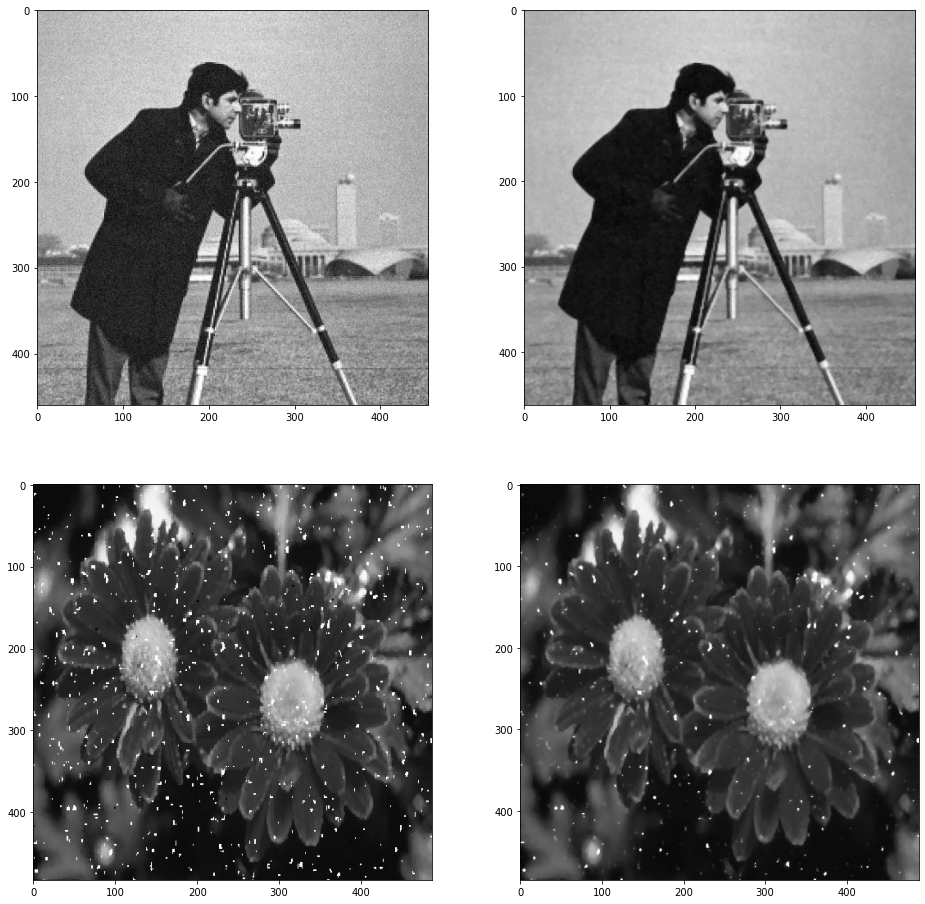

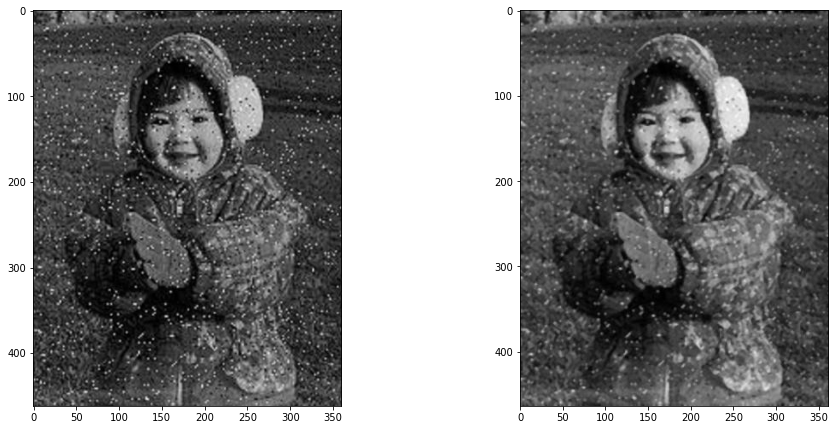

In [18]:
ComRuido1 = np.array(Image.open('cameramanN1.jpg'))
ComRuido2 = np.array(Image.open('flor.jpg'))
ComRuido3 = np.array(Image.open('menina.jpg'))

#converte a imagem em BGR para ser filtrada
image1 = cv2.cvtColor(ComRuido1, cv2.COLOR_BGR2GRAY)
image2 = cv2.cvtColor(ComRuido2, cv2.COLOR_BGR2GRAY)
image3 = cv2.cvtColor(ComRuido3, cv2.COLOR_BGR2GRAY)
    
filtered_image1 = filter_image(image1, mean_median_balanced_filter)
filtered_image2 = filter_image(image2, mean_median_balanced_filter)
filtered_image3 = filter_image(image3, mean_median_balanced_filter)
Image.fromarray(filtered_image1).save('cameramanN2.jpg')
Image.fromarray(filtered_image2).save('flor2.jpg')
Image.fromarray(filtered_image3).save('menina2.jpg')
SemRuido1 = np.array(Image.open('cameramanN2.jpg'))
SemRuido2 = np.array(Image.open('flor2.jpg'))
SemRuido3 = np.array(Image.open('menina2.jpg'))

plt.figure(figsize=(16, 16))
plt.subplot(2, 2, 1)
plt.imshow(ComRuido1)
plt.subplot(2, 2, 2)
plt.imshow(SemRuido1, cmap='gray')
plt.subplot(2, 2, 3)
plt.imshow(ComRuido2)
plt.subplot(2, 2, 4)
plt.imshow(SemRuido2, cmap='gray')
plt.figure(figsize=(16, 16))
plt.subplot(2, 2, 1)
plt.imshow(ComRuido3)
plt.subplot(2, 2, 2)
plt.imshow(SemRuido3, cmap='gray')